In [2]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to /Users/ebravoca/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ebravoca/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [68]:

#P1: Porque Marchas
archivo ="Res_poc_porquemarchas.xlsx"

#P2: Principales Procupaciones
archivo = "Res_poc_princpreocup.xlsx"

#P3: Mejoras
archivo = "Res_poc_mejoras.xlsx"

#P4: Como me afecta lo que esta ocurriendo
archivo = "Res_poc_comomeafecta.xlsx" 


#P5: Por qué causa harías una pancarta hoy
archivo = "Res_poc_pancarta.xlsx" 



df = pd.read_excel(archivo)
data = []
for index, row in df.iterrows():
    data.append((row['Marca temporal'], row['Opción 1'], row['Opción 2'], row['Opción 3'],
                 row['Opción 4'], row['Opción 5'], row['Opción 6'], row['Opción 7'],
                 row['Opción 8'], row['Opción 9'], row['Opción 10']))

    data_df = pd.DataFrame(data, columns=['Marca temporal' ,'Opción 1', 'Opción 2', 'Opción 3',
                                          'Opción 4', 'Opción 5', 'Opción 6','Opción 7',
                                          'Opción 8','Opción 9', 'Opción 10'])
    
data_df.head(4)

,Marca temporal,Opción 1,Opción 2,Opción 3,Opción 4,Opción 5,Opción 6,Opción 7,Opción 8,Opción 9,Opción 10
0,2019-10-31 13:57:40.350,Jubilación Digna,No más delincuencia quiero un país seguro,Quiero que todos tengan derecho a una atención...,Yo cuido mi país por ti por mi por mis hijos y...,1 2 3 por mi y por todas mis amigas. Sueldos j...,Flexibilidad laboral de verdad !!! Para todes !,Educación inclusiva de verdad! No más promesas...,Quiero pagar impuestos pero sentir que los pag...,Mis perros también quieren sus derechos,"Yo por mi tú por mi, cambiemos la mentalidad"
1,2019-10-31 14:04:48.502,Salud para la 3 edad,Educación de calidad para todos,Salarios más justos,AFP,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-10-31 14:07:54.691,Educación Pública Gratuita y de Calidad,"Salud Pública de calidad, incentivar Fonasa y ...",Sistema de pensiones dignos,Igual derechos hombres y mujeres,Matrimonio Igualitario,Bajar sueldo a Parlamentarios y altos mandata...,NaN,NaN,NaN,NaN
3,2019-10-31 14:14:54.894,Rediseño del modelo afp,Necesidades básicas cubiertas para todo,"Basta de robos FFAA, impuestos de todos.",Respeto e igualdad a la mujer,"Educacion, salud y pensiones dignas.",NaN,NaN,NaN,NaN,NaN


            word    weight  count
0          salud  0.339276      4
1      educación  0.339276      4
2      violencia  0.254457      3
3          mejor  0.169638      2
4  parlamentaria  0.169638      2


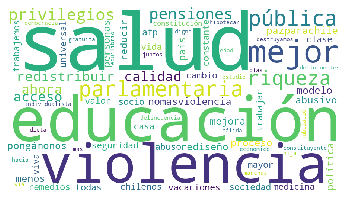

In [81]:
#from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='spanish')

#tfidf_vectorizer = TfidfVectorizer(use_idf=True)

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

#import sys
#print(sys.executable)

from wordcloud import WordCloud
from PIL import Image

#Spanish
from nltk.corpus import stopwords

num_cols = ['Opción 1']
docs = data_df[num_cols].values.tolist()

#print(docs)
#res = [' '.join(str(tups)) for tups in docs]
res = [' '.join(map(str, docs))]

#print(res)
#Extender diccionario
stop = stopwords.words('spanish') + list(string.punctuation)


#Extender el diccionario
newStopWords = ['1','la',
                'mi','preo',
                'viernes','esposa','pasado',
                'genera',
                'quiero', 'mucha','hace','efectos','normal','parte','locomover','cliente','nat', '3', 'x']
stop.extend(newStopWords)



cv = CountVectorizer(stop_words = stop)
 
# this steps generates word counts for the words in your docs
word_count_vector=cv.fit(res)

#print(word_count_vector[0])
feature_names = word_count_vector.get_feature_names()
bag_of_words = cv.transform(res)
df_bag_of_words = pd.DataFrame(bag_of_words.todense(), columns=feature_names)


#print(df_bag_of_words)

transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf = transformer.fit_transform(bag_of_words)

#Contar las palabras
word_cnts = np.asarray(bag_of_words.sum(axis=0)).ravel().tolist()
df_cnts = pd.DataFrame({'word':feature_names, 'count':word_cnts}) 
df_cnts = df_cnts.sort_values('count', ascending=False)

#Sumar los pesos
weights = np.asarray(tfidf.mean(axis=0)).ravel().tolist()
df_weights = pd.DataFrame({'word':feature_names, 'weight': weights})
df_weights = df_weights.sort_values('weight', ascending=False)

df_weights = df_weights.merge(df_cnts, on = 'word', how= 'left')

print(df_weights.head(5))

s_word_freq = pd.Series(df_weights['count'])
s_word_freq.index = df_weights['word']
di_word_freq = s_word_freq.to_dict()

#mask = np.array(Image.open("images2.png"))

cloud = WordCloud(background_color="white", max_words=2000,#mask = mask,
                            width=900, height=500).generate_from_frequencies(di_word_freq)
plt.imshow(cloud)
plt.axis('off')
plt.show()

df_weights.to_csv('paraGephi.csv')





In [82]:
import itertools
import collections
import string

from nltk import bigrams
from nltk.tokenize import sent_tokenize, word_tokenize 

#print(docs)


#sent = "this is a foo bar, bar black sheep."
#stop = stopwords.words('spanish') + list(string.punctuation)
#[i for i in word_tokenize(idea.lower()) if i not in stop]


#Extender el diccionario
#newStopWords = ['1','la',
#                'mi','preo',
#                'viernes','esposa','pasado']
#stop.extend(newStopWords)


#Explorar relaciones entre palabras
ideas = [list(i for i in word_tokenize(idea.lower().replace("'", '')) if i not in stop) for idea in res]

print(ideas)
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(palabras)) for palabras in ideas]

# View bigrams for the first tweet
terms_bigram[0]


# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)



[['jubilación', 'digna', 'salud', 'edad', 'educación', 'pública', 'gratuita', 'calidad', 'rediseño', 'modelo', 'afp', 'reducir', 'dieta', 'parlamentaria', 'cambio', 'constitución', 'violencia', 'pazparachile', 'marchas', 'pongámonos', 'trabajar', 'mayor', 'seguridad', 'delincuentes', 'pensiones', 'destruyamos', 'país', 'calidad', 'educación', 'mejor', 'educación', 'sociedad', 'menos', 'individualista', 'abuso', 'constante', 'clase', 'política', 'hacia', 'chilenos', 'proceso', 'constituyente', 'vía', 'parlamentaria', 'ahora', 'salud', 'cálida', 'acceso', 'universal', 'hipotecar', 'casa', 'vida', 'hija', 'estudie', 'medicina', 'mas', 'violencia', 'mejora', 'pensiones', 'ahora', 'redistribuir', 'riqueza', 'privilegios', 'trabajemos', 'juntos', 'violencia', 'redistribuir', 'riqueza', 'privilegios', 'delincuencia', 'valor', 'remedios', 'abusivo', 'viva', 'democracia', 'nomasviolencia', 'acceso', 'salud', 'todas', 'personas', 'salud', 'equilibrio', 'socio-economico', 'días', 'vacaciones', 'm

[(('educación', 'pública'), 2),
 (('mejor', 'educación'), 2),
 (('redistribuir', 'riqueza'), 2),
 (('riqueza', 'privilegios'), 2),
 (('jubilación', 'digna'), 1),
 (('digna', 'salud'), 1),
 (('salud', 'edad'), 1),
 (('edad', 'educación'), 1),
 (('pública', 'gratuita'), 1),
 (('gratuita', 'calidad'), 1),
 (('calidad', 'rediseño'), 1),
 (('rediseño', 'modelo'), 1),
 (('modelo', 'afp'), 1),
 (('afp', 'reducir'), 1),
 (('reducir', 'dieta'), 1),
 (('dieta', 'parlamentaria'), 1),
 (('parlamentaria', 'cambio'), 1),
 (('cambio', 'constitución'), 1),
 (('constitución', 'violencia'), 1),
 (('violencia', 'pazparachile'), 1)]

In [71]:
bigram_df = pd.DataFrame(bigram_counts.most_common(30),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(educación, pública)",2
1,"(mejor, educación)",2
2,"(redistribuir, riqueza)",2
3,"(riqueza, privilegios)",2
4,"(jubilación, digna)",1
5,"(digna, salud)",1
6,"(salud, 3)",1
7,"(3, edad)",1
8,"(edad, educación)",1
9,"(pública, gratuita)",1


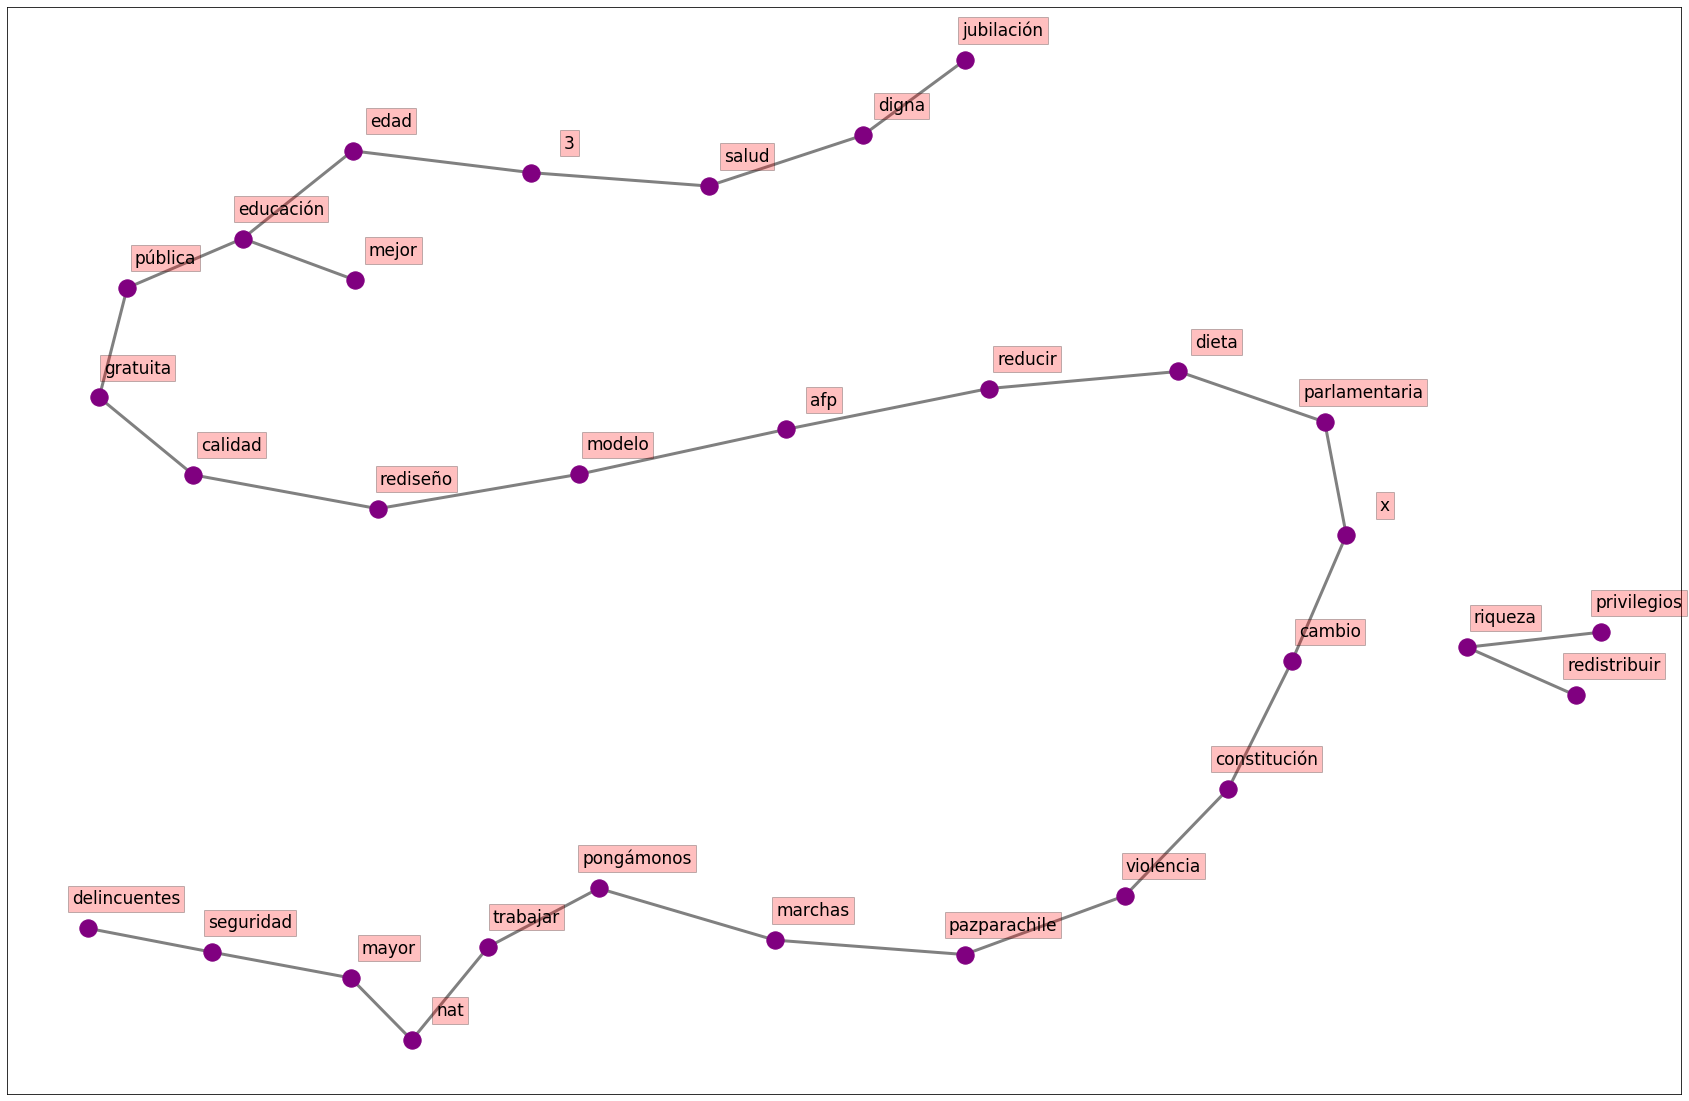

In [89]:
#Crear el grafico
import networkx as nx

# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

#print(G)
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 30))

#G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(30, 20))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

#print(nx)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.045, value[1]+.045
    ax.text(x, y,
            s = key,
            bbox = dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=17)
    
plt.show()

In [84]:
from polyglot.text import Text

from polyglot.downloader import downloader
#print(downloader.supported_languages_table("sentiment2", 3))




In [51]:
#print(res)

#polyglot download embeddings2.es

str1 = " "

texto = str1.join(res)

texto1 = Text(texto)

first_sentence = texto1.sentences[0]
print(first_sentence)

first_entity = first_sentence.entities[0]
print(first_entity)

print("positivo: {:}" + str(first_entity.positive_sentiment))
print("negativo: {:}" + str(first_entity.negative_sentiment))
#print(texto)

#res = [' '.join(s) for tups in res]

Nueva Constitución  Por una pensión Justa  Educacion publica de calidad Rebaja sueldo parlamentario a 2.5 millones seguridad  Para cambiar el sistema provisional  Para el fin de la AFP Por mejoras en la Salud Sueldos Para mejorar la salud incluso sea gratis Sueldos justos  Soy Testigo de Jehová, por lo cual no participo de las Marchas y protestas Por la salud  Sueldos Prenatal de 1 año
['AFP']
positivo: {:}0
negativo: {:}0.9393939393939394


In [94]:
downloader.supported_tasks(lang="es")
#downloader.download("sentiment2.gn")
#print(type(ideas))

str1 = " "

print("{:<16}{:<16}{}".format("Idea", "Word", "Polarity")+"\n"+"-"*40)
cont = 1
#print(ideas)
for i in ideas:
    text = Text(str1.join(i))
    
    for w in text.words:
        try: 
            print("{:<16}{:<16}{:>2}".format(str(cont), w, w.polarity))
        
        except:
             print(" ")
        
        finally:
            print(" ")
    
   


Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.


Idea            Word            Polarity
----------------------------------------
1               nueva            0
 
1               constitución     0
 
1               pensión          0
 
1               justa            0
 
1               educacion        0
 
1               publica          0
 
1               calidad          0
 
1               rebaja           0
 
1               sueldo           0
 
1               parlamentario    0
 
1               2.5              0
 
1               millones         0
 
1               seguridad        0
 
 
 
 
 


Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.


 
 
 
 
 
 
1               mejoras          1
 
1               salud            0
 
1               sueldos          0
 
1               mejorar          1
 
1               salud            0
 
1               incluso          0
 
1               gratis           1
 
1               sueldos          0
 
1               justos           0
 
 
 
 
 
 
 
 
 
 
 
1               salud            0
 
1               sueldos          0
 
1               prenatal         0
 
1               1                0
 
1               año              0
 
